In [1]:
import sympy as sp
#Для красивой печати:
sp.init_printing(use_unicode=False, wrap_line=False, no_global=True)
import matplotlib.pyplot as plt
#from IPython.display import display #подключить, если не работает display

# Занятие 12
# Алгебра
 

Для рисования пространственных изображений, состоящих из точек и отрезков,
используем проектирование на плоскость $\pi$ и введение на этой плоскости системы координат, состоящей из двух взаимно перпендикулярных прямых.

Вертикальную прямую выберем так, что проекции всех точек и отрезков в пространстве на плоскость $\pi$ будут расположены правее этой вертикальной оси.

Изображаемые фигуры будем выбирать из первого координатного октанта, плоскость $\pi$ проходит через точку $S(0,0,20)$, вектор нормали $n(1,1,1)$. Так обеспечим то, что проекции всех трехмерных объектов на плоскость $\pi$  будут расположены выше горизонтальной оси.

Вначале построим двумерную систему координат и изображения в ней трехмерных осей координат.

View_Plane - плоскость $\pi$,

_x,_y,_z - точки пересечения осей ОХ OY,OZ с плоскостью View_Plane

OX,OY,OZ - трехмерные оси координат, их будем изображать отрезками с концами в начале координат и в точках _x,_y,_z

Xaxis - горизонтальная координатная ось в плоскости View_Plane,
она проходит через точки _x и _y

Yaxis - вертикальная координатная ось в плоскости View_Plane,
ее проведем через точку _x перпендикулярно Xaxis в плоскости View_Plane,
заметив, что точка _z+_x-_O лежит на этой прямой (_O - проекция _z на Xaxis)

In [2]:
def _view(O1=sp.Point(0,0,10),normal_vector=(1,1,1)):
    _O_3D=sp.Point(0,0,0)
    View_Plane= sp.Plane(O1, normal_vector)
    _x=View_Plane.intersection(sp.Line(_O_3D,sp.Point(1,0,0)))[0]
    _y=View_Plane.intersection(sp.Line(_O_3D,sp.Point(0,1,0)))[0]
    _z=View_Plane.intersection(sp.Line(_O_3D,sp.Point(0,0,1)))[0]
    OX=sp.Segment(_O_3D,_x)
    OY=sp.Segment(_O_3D,_y)
    OZ=sp.Segment(_O_3D,_z)
    Xaxis=sp.Line(_x,_y)
    _O=Xaxis.projection(_z)
    Yaxis=sp.Line(_x,_z+_x-_O)
    return [[Xaxis,Yaxis],OX,OY,OZ,View_Plane]

Служебная _view строит оси двумерной системы координат, а также отрезки осей трехмерной системы координат и плоскость View_Plane. Поскольку эта функция нужна только для внутреннего употребления, ее имя начинается с _

Далее будем использовать такое именование для служебных переменных.

Построив плоскость View_Plane, можем спроектировать на нее все нужные нам трехмерные объекты: точки, прямые, отрезки, лучи, многоугольники (заданные списками вершин).

Проектирование разных типов объектов опишем разными функциями.

In [3]:
def point_to2D(point,axis_xy,View_Plane): #axis_xy - list из осей ОХ и ОУ, эти оси - Line3D на плоскости View_Plane
    point_new=View_Plane.projection(point)
    return sp.Point(axis_xy[1].distance(point_new),axis_xy[0].distance(point_new))
def line_to2D(line,axis_xy,View_Plane):#line- Line3D
    _A=line.p1
    _B=line.p2
    _A2D=point_to2D(_A,axis_xy,View_Plane)
    _B2D=point_to2D(_B,axis_xy,View_Plane)
    return sp.Line(_A2D,_B2D)
def segment_to2D(segment,axis_xy,View_Plane):#line- Line3D
    _A=segment.p1
    _B=segment.p2
    _A2D=point_to2D(_A,axis_xy,View_Plane)
    _B2D=point_to2D(_B,axis_xy,View_Plane)
    return sp.Segment(_A2D,_B2D)
def ray_to2D(ray,axis_xy,View):#line- Line3D
    _A,_B=ray.points
    _A2D=point_to2D(_A,axis_xy,View_Plane)
    _B2D=point_to2D(_B,axis_xy,View_Plane)
    return sp.Ray(_A2D,_B2D)
def poly_to2D(points,axis_xy,View_Plane): #points - list из вершин многоугольника 3D
    points2D=[point_to2D(P,axis_xy,View_Plane) for P in points]
    return sp.Polygon(*points2D)

Теперь опишем функцию, проектирующую любой из упомянутых объектов: 

In [4]:
def to2D(obj,axis_xy,View):
    if type(obj)==sp.geometry.point.Point3D:
        return point_to2D(obj,axis_xy,View_Plane)
    if type(obj)==sp.geometry.line.Line3D:
        return line_to2D(obj,axis_xy,View_Plane)
    if type(obj)==sp.geometry.line.Segment3D:
        return segment_to2D(obj,axis_xy,View_Plane)
    if type(obj)==sp.geometry.line.Ray3D:
        return ray_to2D(obj,axis_xy,View_Plane)
    if type(obj)==list:
        if len(obj)>2:
            return poly_to2D(obj,axis_xy,View_Plane)
        else:
            return "error: less than 3 points"
    

Опишем функцию, рисующую отдельные трехмерные объекты.

Многоугольники можно рисовать с заливкой с помощью fill.

In [5]:
def draw3D_2D_obj(obj,axis_xy,View_Plane,color='blue'):
    if type(obj)==sp.geometry.point.Point3D:
        _P=point_to2D(obj,axis_xy,View_Plane)
        plt.scatter(_P.x,_P.y,color=color)
        return True
    if type(obj)==sp.geometry.line.Line3D:
        _L=line_to2D(obj,axis_xy,View_Plane)
        plt.plot([_L.p1.x,_L.p2.x],[_L.p1.y,_L.p2.y],color=color) 
        return True
    if type(obj)==sp.geometry.line.Segment3D:
        _Seg=segment_to2D(obj,axis_xy,View_Plane)
        plt.plot([_Seg.p1.x,_Seg.p2.x],[_Seg.p1.y,_Seg.p2.y],color=color)
        return True
    if type(obj)==sp.geometry.line.Ray3D:
        _R=ray_to2D(obj,axis_xy,View_Plane)
        plt.plot([_R.p1.x,_R.p2.x],[_R.p1.y,_R.p2.y],color=color)
        return True 
    if type(obj)==list:
        _Poly=[point_to2D(P,axis_xy,View_Plane) for P in obj]
        _Poly+=[_Poly[0]]
        _X=[V.x for V in _Poly]
        _Y=[V.y for V in _Poly]
        #plt.plot(_X,_Y,color=color)
        plt.fill(_X,_Y,color=color)
        plt.savefig("Pict.png")
    return True

Теперь опишем функцию, рисующую всю сцену: координатные оси в трехмерном пространстве,
все заданные пользователем фигуры, причем каждую фигуру можно рисовать своим цветом.

In [6]:
def draw3D(*objects,View='Common'):
    if type(View)==str:
        if View!='Common':
            return 'error: view'
        else:
            axis_xy,OX,OY,OZ,View_Plane=_view(sp.Point(0,0,10),(1,1,1))
            #print('axis_xy')
            #display(axis_xy)
    else:
        pass
    objects+=(tuple((OX,'k')),tuple((OY,'k')),tuple((OZ,'k'))) 
    #display(objects)
    for obj in objects:
        
        draw3D_2D_obj(obj[0],axis_xy,View_Plane,color=obj[1])
        plt.axis('equal')

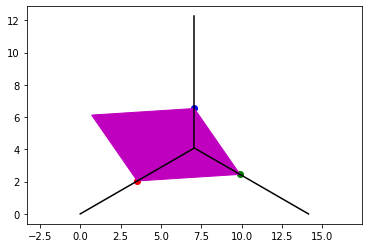

In [7]:
A=sp.Point(5,0,0)
B=sp.Point(0,4,0)
C=sp.Point(0,0,3)
D=A+C-B
F=sp.Point(10,10,10)
TriangleABC=[A,B,C,D]
draw3D((TriangleABC,'m'),(A,'r'),(B,'g'),(C,'b'),(F,'y'),View='Common')